# Phase 2: Data Acquisition & Understanding
###### This notebook focuses on loading the raw "Online Retail II" dataset, performing initial data inspection, and conducting basic cleaning to prepare the data for more in-depth feature engineering and analysis.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better viewing of DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Acquisition: Load the Dataset

In [2]:
file_path = r'../data/raw/online_retail_II.csv'

try:
    # Load the data from the CSV file
    df_raw = pd.read_csv(file_path)
    print(f"\nSuccessfully loaded data from {file_path}")
    print(f"Initial raw data shape: {df_raw.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please ensure 'online_retail_II.csv' is in the 'data/raw/' directory.")
    df_raw = pd.DataFrame()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df_raw = pd.DataFrame()


Successfully loaded data from ../data/raw/online_retail_II.csv
Initial raw data shape: (1067371, 8)


## 2. Initial Data Inspection

In [3]:
# Get a quick overview of the data: types, non-null values, memory usage.
print("\n--- Initial DataFrame Information ---")
df_raw.info()


--- Initial DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
# Display the first few rows to understand the structure and content.
print("\n--- First 5 Rows of the Dataset ---")
df_raw.head()


--- First 5 Rows of the Dataset ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Display basic descriptive statistics for numerical columns.
print("\n--- Descriptive Statistics for Numerical Columns ---")
df_raw.describe()


--- Descriptive Statistics for Numerical Columns ---


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
# Check for unique values in categorical columns like 'Country'
print("\n--- Unique Countries in the Dataset ---")
df_raw['Country'].value_counts().head(10)


--- Unique Countries in the Dataset ---


Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Spain               3811
Switzerland         3189
Belgium             3123
Portugal            2620
Australia           1913
Name: count, dtype: int64

## 3. Data Cleaning: Initial Steps
###### Identify and handle missing values, duplicates, and invalid entries.

In [7]:
# Check for missing values in each column
print("\n--- Missing Values Before Cleaning ---")
df_raw.isnull().sum()


--- Missing Values Before Cleaning ---


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

##### Key observations from .info() and .isnull().sum():

- 'Customer ID' has a significant number of missing values. Transactions without a customer ID are often difficult to attribute and analyze for churn, so we'll drop them.
- 'Description' also has missing values. While important for product analysis, it's less critical for customer churn itself, but we should handle it if needed for feature engineering later.

In [8]:
# Drop rows where 'Customer ID' is null, as these cannot be attributed to a specific customer for churn analysis.
df_cleaned = df_raw.dropna(subset=['Customer ID']).copy()
print(f"\nShape after dropping rows with missing Customer ID: {df_cleaned.shape}")


Shape after dropping rows with missing Customer ID: (824364, 8)


In [9]:
# Convert 'Customer ID' to integer type, as it's often read as float due to NaNs
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int)
print("\n--- Data types after converting Customer ID ---")
df_cleaned.info()


--- Data types after converting Customer ID ---
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  int32  
 7   Country      824364 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 53.5+ MB


In [10]:
# Handle 'Description' missing values: Fill with 'Unknown' or drop if necessary for later features.
# For now, let's fill them to prevent errors in potential future text-based features.
df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')
print(f"\nMissing values after handling Customer ID and Description: {df_cleaned.isnull().sum().sum()}")


Missing values after handling Customer ID and Description: 0


##### Clean 'Quantity' and 'UnitPrice':
- Quantity can be negative (returned items). For churn prediction, negative quantities might
- Complicate analysis or might be a sign of a bad customer experience.
- For simplicity in initial RFM calculation, we'll remove transactions with non-positive Quantity.
- However, it's worth noting that returns are valuable customer behavior and could be a feature itself.
- For this project, we'll focus on purchases.
- UnitPrice must be positive.

In [11]:
print(f"\nOriginal rows with non-positive Quantity: {df_cleaned[df_cleaned['Quantity'] <= 0].shape[0]}")
print(f"Original rows with non-positive Price: {df_cleaned[df_cleaned['Price'] <= 0].shape[0]}")


Original rows with non-positive Quantity: 18744
Original rows with non-positive Price: 71


In [12]:
# Filter out rows where Quantity or Price are non-positive
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]
print(f"Shape after removing non-positive Quantity/Price: {df_cleaned.shape}")

Shape after removing non-positive Quantity/Price: (805549, 8)


In [13]:
# Handle cancelled orders:
# Invoice often starts with 'C' for cancelled orders.
# These should be removed as they don't represent actual purchases.
df_cleaned = df_cleaned[~df_cleaned['Invoice'].astype(str).str.contains('C', na=False)]
print(f"Shape after removing cancelled orders: {df_cleaned.shape}")

Shape after removing cancelled orders: (805549, 8)


In [14]:
# Convert 'InvoiceDate' to datetime objects
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
print("\n--- Data types after converting InvoiceDate ---")
df_cleaned.info()


--- Data types after converting InvoiceDate ---
<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  int32         
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 52.2+ MB


In [15]:
# Calculate 'TotalPrice' for each item in a transaction (Quantity * Price)
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']
print("\n--- First 5 Rows with TotalPrice ---")
df_cleaned.head()


--- First 5 Rows with TotalPrice ---


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [16]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df_cleaned.duplicated().sum()}")
df_cleaned.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df_cleaned.shape}")


Number of duplicate rows: 26124
Shape after dropping duplicates: (779425, 9)


In [17]:
print("\n--- Cleaned Data Information ---")
df_cleaned.info()


--- Cleaned Data Information ---
<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  int32         
 7   Country      779425 non-null  object        
 8   TotalPrice   779425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 56.5+ MB


In [18]:
print("\n--- Cleaned Data Description ---")
df_cleaned.describe()


--- Cleaned Data Description ---


,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
count,779425.000000,779425,779425.000000,779425.000000,779425.000000
mean,13.489370,2011-01-03 01:44:42.593475584,3.218488,15320.360461,22.291823
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-02 14:39:00,1.250000,13971.000000,4.950000
50%,6.000000,2010-12-02 14:09:00,1.950000,15247.000000,12.480000
75%,12.000000,2011-08-01 13:44:00,3.750000,16794.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000
std,145.855814,NaN,29.676140,1695.692775,227.427075


## 4. Save the Cleaned Data

In [19]:
# Save the cleaned DataFrame to the 'data/processed/' directory for future use.
output_file_path = '../data/processed/online_retail_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)
print(f"\nCleaned data saved to {output_file_path}")

print("\n--- Initial EDA and Cleaning Complete ---")

# You can now proceed to explore the cleaned data more deeply


Cleaned data saved to ../data/processed/online_retail_cleaned.csv

--- Initial EDA and Cleaning Complete ---


##  5. Deeper Exploratory Data Analysis (EDA) on Cleaned Data 

In [20]:
# Load the cleaned data to ensure we are working with the processed version
try:
    df_eda = pd.read_csv(output_file_path)
    df_eda['InvoiceDate'] = pd.to_datetime(df_eda['InvoiceDate']) # Ensure InvoiceDate is datetime
    print(f"\nSuccessfully loaded cleaned data for deeper EDA from {output_file_path}")
    print(f"Cleaned data shape for EDA: {df_eda.shape}")
except FileNotFoundError:
    print(f"Error: Cleaned data file not found at {output_file_path}. Please run previous cells.")
    df_eda = pd.DataFrame()
except Exception as e:
    print(f"An error occurred while loading cleaned data: {e}")
    df_eda = pd.DataFrame()


Successfully loaded cleaned data for deeper EDA from ../data/processed/online_retail_cleaned.csv
Cleaned data shape for EDA: (779425, 9)


In [21]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  int64         
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  int64         
 7   Country      779425 non-null  object        
 8   TotalPrice   779425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 53.5+ MB


In [22]:
print("\n--- Time Range of the Dataset ---")
min_date = df_eda['InvoiceDate'].min()
max_date = df_eda['InvoiceDate'].max()
print(f"Data spans from: {min_date}")
print(f"Data spans to:   {max_date}")
print(f"Total duration:  {max_date - min_date}")


--- Time Range of the Dataset ---
Data spans from: 2009-12-01 07:45:00
Data spans to:   2011-12-09 12:50:00
Total duration:  738 days 05:05:00


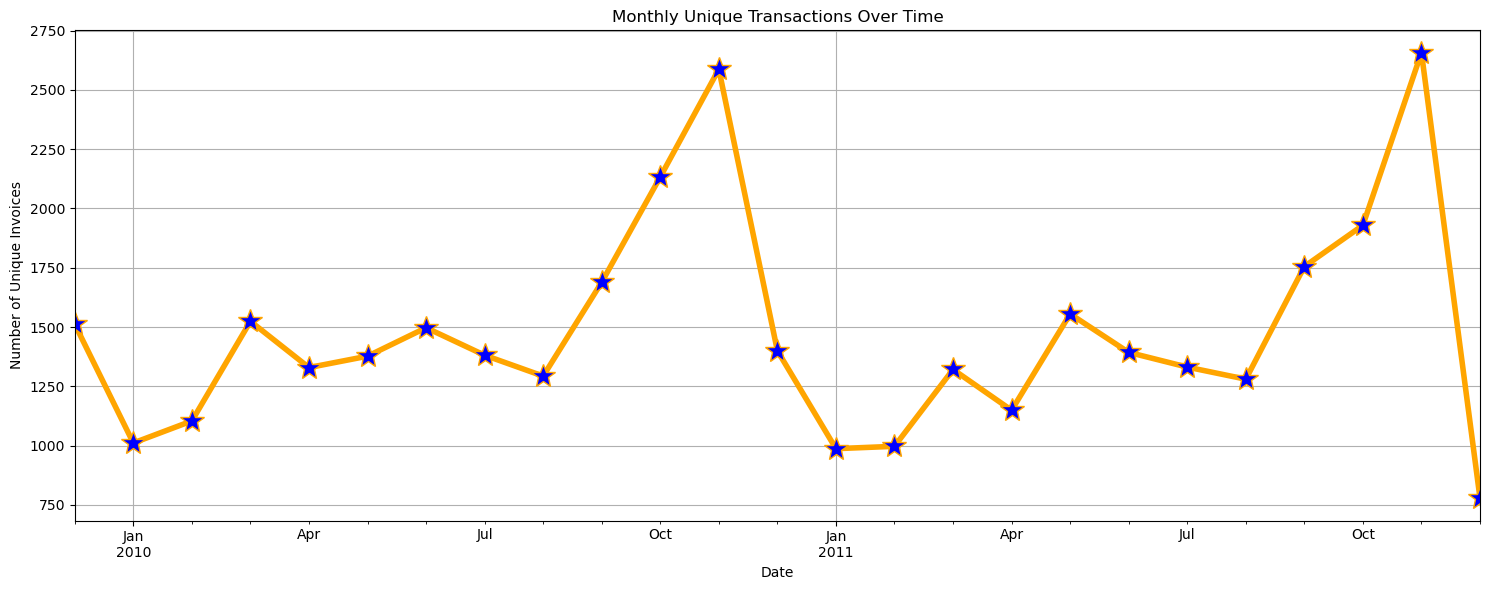

In [29]:
# Plotting transactions over time
plt.figure(figsize=(15, 6))
df_eda.set_index('InvoiceDate').resample('ME')['Invoice'].nunique().plot(color='orange', marker='*', lw=4, ms=18, mfc='blue')
plt.title('Monthly Unique Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Invoices')
plt.grid(True)
plt.tight_layout()
plt.show()

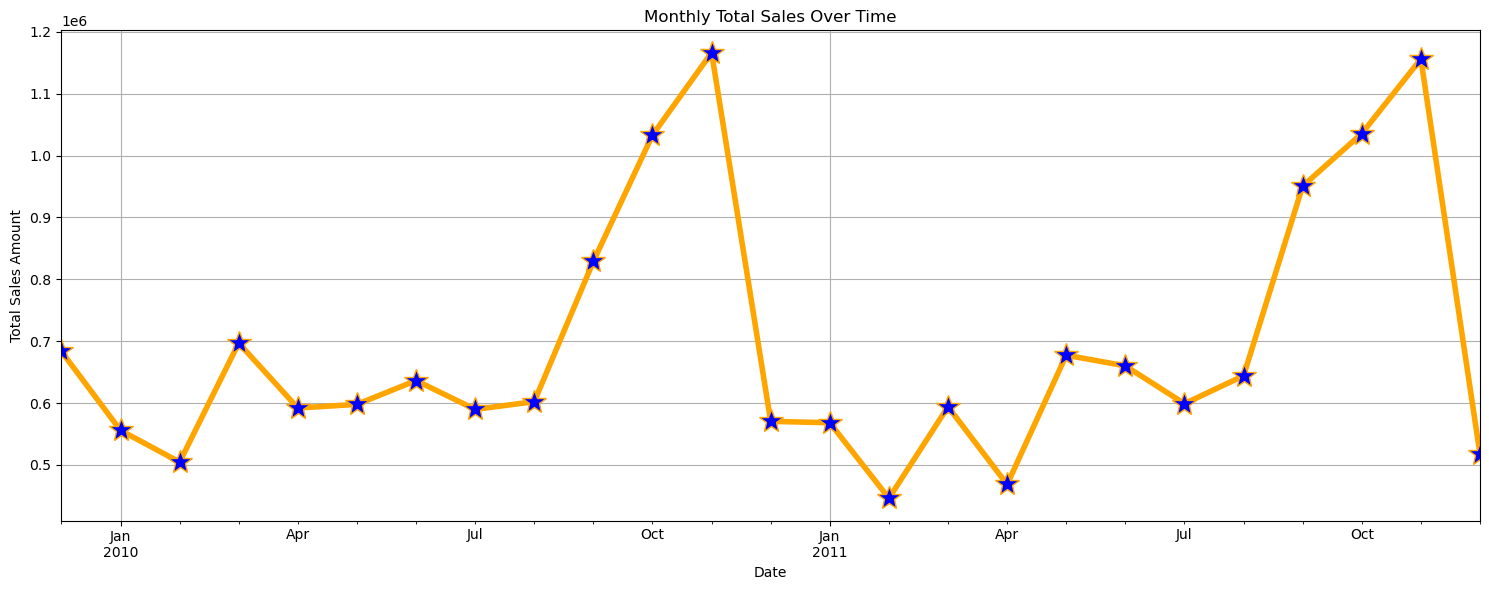

In [30]:
plt.figure(figsize=(15, 6))
df_eda.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum().plot(color='orange', marker='*', lw=4, ms=18, mfc='blue')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()



--- Distribution of Quantity, Price, and TotalPrice ---


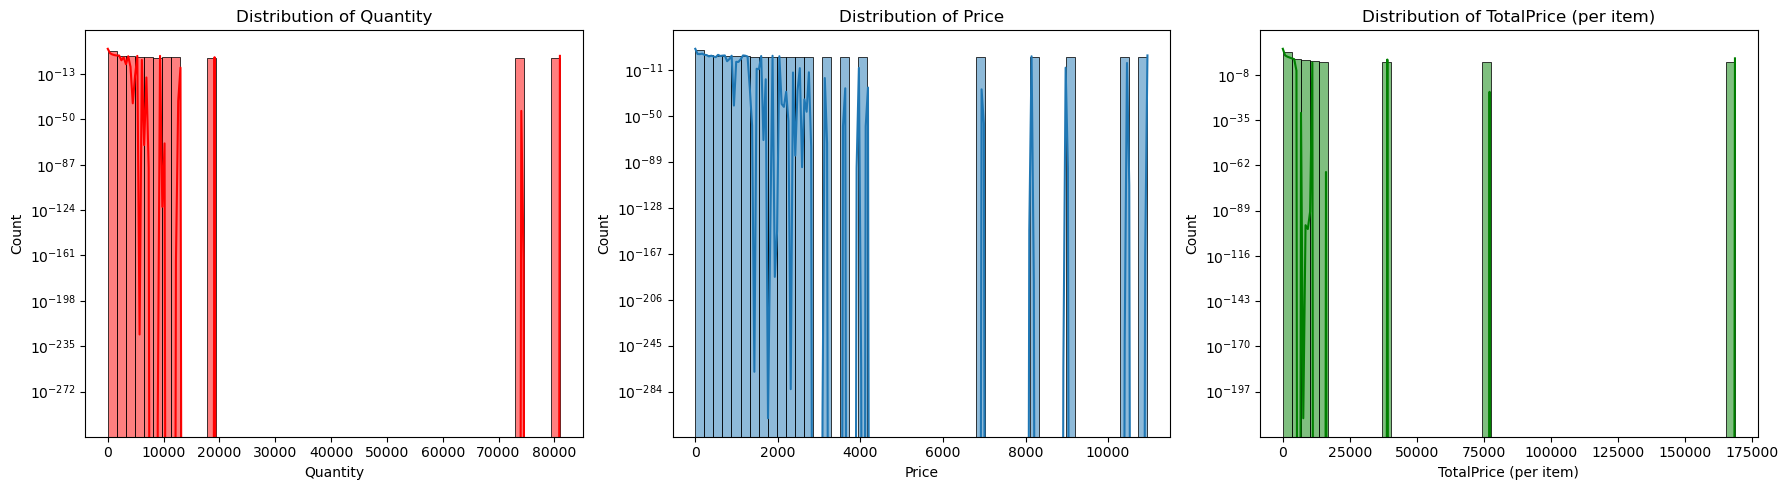

In [32]:
print("\n--- Distribution of Quantity, Price, and TotalPrice ---")
plt.figure(figsize=(18, 5))
# Distribution of Quantity
plt.subplot(1, 3, 1)
sns.histplot(df_eda['Quantity'], bins=50, kde=True, color='r')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.yscale('log') # Use log scale due to high skewness

# Distribution of Price
plt.subplot(1, 3, 2)
sns.histplot(df_eda['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log') # Use log scale due to high skewness

# Distribution of TotalPrice
plt.subplot(1, 3, 3)
sns.histplot(df_eda['TotalPrice'], bins=50, kde=True, color='g')
plt.title('Distribution of TotalPrice (per item)')
plt.xlabel('TotalPrice (per item)')
plt.ylabel('Count')
plt.yscale('log') # Use log scale due to high skewness


plt.tight_layout()
plt.show()

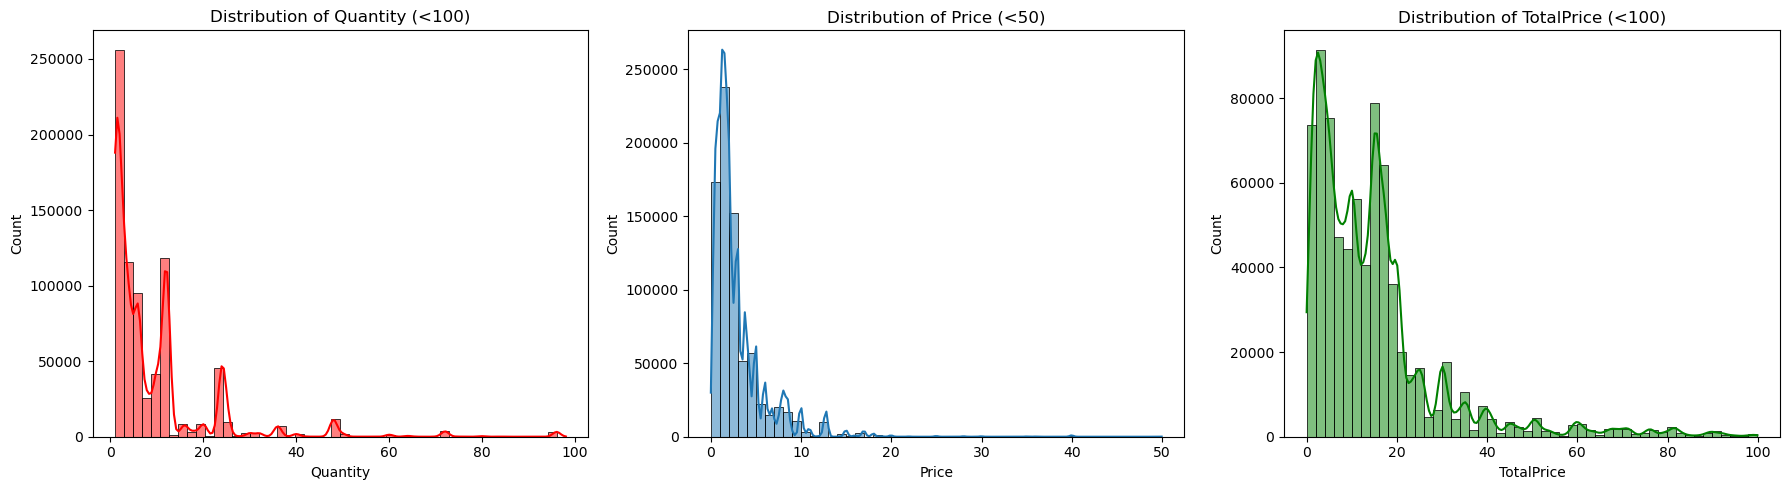

In [33]:
# Focus on more common ranges for better visualization of dense areas
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_eda[df_eda['Quantity'] < 100]['Quantity'], bins=50, kde=True, color='r')
plt.title('Distribution of Quantity (<100)')
plt.xlabel('Quantity')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df_eda[df_eda['Price'] < 50]['Price'], bins=50, kde=True)
plt.title('Distribution of Price (<50)')
plt.xlabel('Price')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(df_eda[df_eda['TotalPrice'] < 100]['TotalPrice'], bins=50, kde=True, color='g')
plt.title('Distribution of TotalPrice (<100)')
plt.xlabel('TotalPrice')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


--- Top 10 Countries by Number of Transactions ---
Country
United Kingdom    700388
Germany            16432
EIRE               15565
France             13511
Netherlands         5085
Spain               3662
Belgium             3055
Switzerland         3005
Portugal            2356
Australia           1789
Name: count, dtype: int64


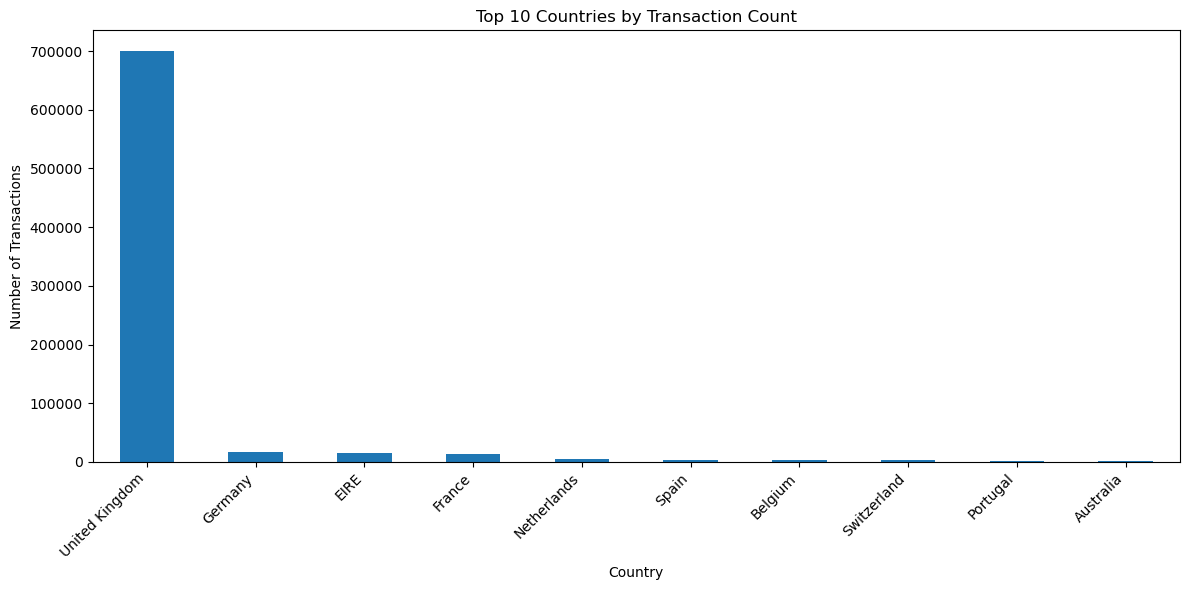

In [34]:
print("\n--- Top 10 Countries by Number of Transactions ---")
print(df_eda['Country'].value_counts().head(10))

plt.figure(figsize=(12, 6))
df_eda['Country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Top 10 Countries by Total Sales ---
Country
United Kingdom    1.438923e+07
EIRE              6.165705e+05
Netherlands       5.540381e+05
Germany           4.250197e+05
France            3.487690e+05
Australia         1.692835e+05
Spain             1.083325e+05
Switzerland       1.000619e+05
Sweden            9.151582e+04
Denmark           6.858069e+04
Name: TotalPrice, dtype: float64


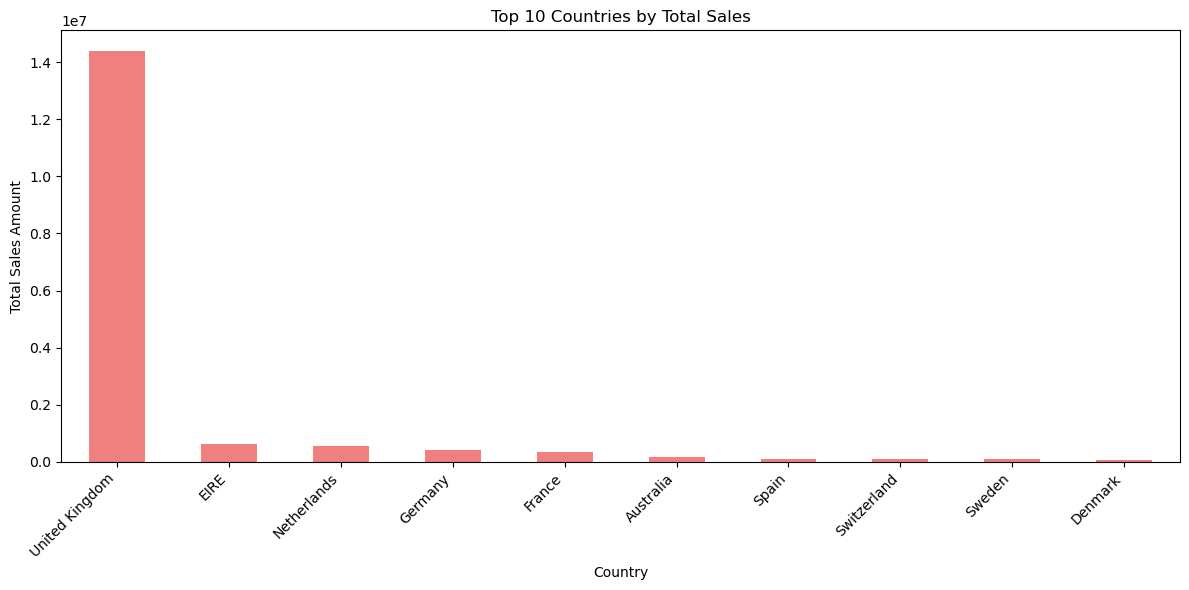

In [35]:
print("\n--- Top 10 Countries by Total Sales ---")
country_sales = df_eda.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(country_sales)

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
print(f"\nTotal unique customers: {df_eda['Customer ID'].nunique()}")


Total unique customers: 5878


## 6. Preliminary Discussion: Defining Churn
#### Based on the time range identified (e.g., from 2009-12-01 to 2011-12-09), we need to define our observation window and churn window.

##### Churn in this context means a customer has stopped purchasing for a certain period.

##### To predict churn, we need to:
- 1. Define an "Observation Period": The historical period from which we extract customer features.
- 2. Define a "Churn Window" (or Prediction Window): The future period in which we observe if a customer makes a purchase or not. If they don't, they are marked as churned.

# For example, if our data ends on 2011-12-09:
# We might choose an observation period ending on, say, 2011-09-09 (3 months before the data ends).
# Then, the churn window would be from 2011-09-09 to 2011-12-09.
# A customer who purchased *within* the observation period but *not* within the churn window would be considered churned.


# --- End of Notebook 01 ---

In [ ]:
print("\n--- Next Steps for Churn Definition ---")
print(f"The data ranges from {min_date} to {max_date}.")
print("We need to decide on an 'Observation End Date' and a 'Churn Window Duration'.")
print("A common approach is to use the last known date in the dataset as the absolute end for churn observation.")
print("For instance, we can define the last 3-6 months of our data as the churn observation window.")
print("Customers active before this window but not within it would be labeled as churned.")